# Importing initial libraries 

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Importing the data/images
## Importing the labels 
Before being able to import the data/images, I need to import the csv file containing all the data about the location and description of the images.

In [4]:
df = pd.read_csv("data/labels.csv")

# Check for the head of the dataframe
df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


## Exploring and cleaning the dataframe
Before I can utilise the data provided in the dataframe, I am going to look whether I can use all the values provided by the authors of the dataset in this csv file.

In [6]:
# Checking for unique values in "Name"
df.Name.unique()

array(['Speed limit (5km/h)', 'Speed limit (15km/h)',
       'Speed limit (30km/h)', 'Speed limit (40km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'speed limit (80km/h)',
       'Dont Go straight or left', 'Dont Go straight or Right',
       'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right',
       'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car',
       'No horn', 'Go straight or right', 'Go straight', 'Go Left',
       'Go Left or right', 'Go Right', 'keep Left', 'keep Right',
       'Roundabout mandatory', 'watch out for cars', 'Horn',
       'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals',
       'Danger Ahead', 'Zebra Crossing', 'Children crossing',
       'Dangerous curve to the left', 'Dangerous curve to the right',
       'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight',
       'Go left or straight', 'Unknown4', 'ZigZag Curve',
       'Train Crossing', 'Under Construction', 'Unkn

In [7]:
# There are a few "Unknown" labels, which must be removed
df = df.loc[~df['Name'].str.contains("Unknown")]
df.Name.unique()

array(['Speed limit (5km/h)', 'Speed limit (15km/h)',
       'Speed limit (30km/h)', 'Speed limit (40km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'speed limit (80km/h)',
       'Dont Go straight or left', 'Dont Go straight or Right',
       'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right',
       'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car',
       'No horn', 'Go straight or right', 'Go straight', 'Go Left',
       'Go Left or right', 'Go Right', 'keep Left', 'keep Right',
       'Roundabout mandatory', 'watch out for cars', 'Horn',
       'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals',
       'Danger Ahead', 'Zebra Crossing', 'Children crossing',
       'Dangerous curve to the left', 'Dangerous curve to the right',
       'Go right or straight', 'Go left or straight', 'ZigZag Curve',
       'Train Crossing', 'Under Construction', 'Fences',
       'Heavy Vehicle Accidents', 'Give Way', 'No 

## Getting the images
Now that all the labels have a distinct and meaningful description, I can now import the images. I will resize the images to ensure that the dimensions of the images is uniform accross the dataset. I will also normalise the images by divide each image's pixel value by 255; since a pixel value ranges between 0 and 255, this will decrese the intensity of the pixel values by assigning them a value between 0 and 1, which helps to keep the values consistent and helps the model learn faster.

In [9]:
train_dataset = []
IMG_SIZE = 28

train_path = "data/traffic_Data/DATA/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = train_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = img/255.0
                train_dataset.append([img, i])

In [10]:
test_dataset = []

test_path = "data/traffic_Data/TEST/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = test_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img = img/255.0
                test_dataset.append([img, i])

## Randomising the dataset 
This will make suret hat my neural network is not going to overfit for one specific class.

In [12]:
import random 
random.shuffle(test_dataset)
random.shuffle(train_dataset)

# Training the Naive Bayes model
Now that I have imported the images with which I am going to train my model with, I am going to have to build a neural network.
## Importing machine learning library - Naive Bayes from sklearn

In [14]:
from sklearn.naive_bayes import GaussianNB

Before training my model, I am going to flatten the images (turn my images into a 1D vector), which is the necessary format requuired for a Naive Bayes model. Furthermore, since computers find it difficult to interpret strings, I am going to use the class ID of the images as the labels of the images.

In [15]:
x = []
y = []

## Splitting dataset into x and y
for item in train_dataset:
    x.append(item[0].flatten())
    y.append(item[1])

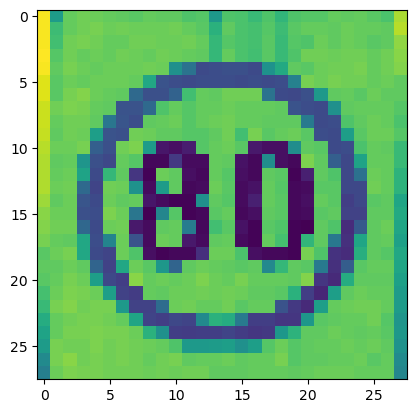

'speed limit (80km/h)'

In [16]:
plt.imshow(train_dataset[0][0])
plt.show()
df.Name[y[0]]

In [17]:
model = GaussianNB()
model.fit(x, y) # Training the model

GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
x_test = []
y_test = []

# Splitting the training data into x and y
for item in test_dataset:
    x_test.append(item[0].flatten())
    y_test.append(item[1])

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) # Calculating the model's accuracy

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 17.04%


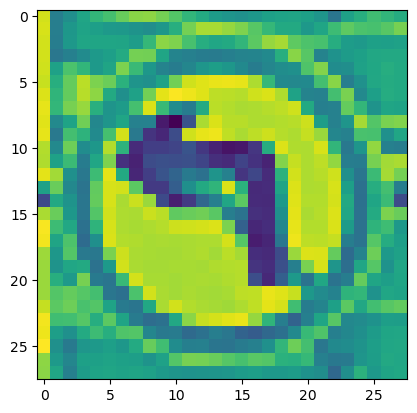

11

In [20]:
plt.imshow(test_dataset[1][0])
plt.show()
y_test[1]

In [21]:
p = model.predict([test_dataset[1][0].flatten()])
df.Name[p]

11    Dont Go Left
Name: Name, dtype: object

# First training results
In this first training model, I have converted the images into grayscale to train the model faster to create a "prototype".
We can see that using grascale images gives us an accuracy of 17.04%; so no I will try to use RGB images to see if I can increase the accuracy of my model.
## Assumption
The assumption is that it will increase my accuracy, as RGB images contain 3 times more informations, meaning that the model should be able to distinguish between the images more easily.
# Importing RGB images

In [23]:
train_dataset = []
IMG_SIZE = 28

train_path = "data/traffic_Data/DATA/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = train_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = img/255.0
                train_dataset.append([img, i])

In [24]:
test_dataset = []

test_path = "data/traffic_Data/TEST/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = test_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = img/255.0
                test_dataset.append([img, i])

In [25]:
x = []
y = []

## Splitting dataset into x and y
for item in train_dataset:
    x.append(item[0].flatten())
    y.append(item[1])

In [26]:
rgb_model = GaussianNB()
rgb_model.fit(x, y)

GaussianNB()

In [27]:
x_test = []
y_test = []

# Splitting the training data into x and y
for item in test_dataset:
    x_test.append(item[0].flatten())
    y_test.append(item[1])

y_pred = rgb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred) # Calculating the model's accuracy

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 22.31%


# Results with RGB images
As assumed earlier, the images with RGB colours have a higher accuracy. Now that I have gotten a higher accuracy by changing the colour scale, I want to see if I get a higher accuracy by changing the sizes of the training images.
## Assumption
The assumption is that the model will take longer time to train, but it will have a higher accuracy with higher defenition images.
# Testing model with different image resolutions

In [29]:
IMG_SIZE = 16
sizes = []
accuracies = []

for i in range(16):
    # Getting training images
    train_dataset = []
    train_path = "data/traffic_Data/DATA/"
    classIDs = df.ClassId
    
    for i in range(0, int(df.iloc[-1].ClassId)):
        if i in classIDs:
            folder = train_path + str(i)
            for filename in os.listdir(folder):
                img = cv.imread(os.path.join(folder, filename))
                if img is not None:
                    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                    img = img/255.0
                    train_dataset.append([img, i])

    # Getting testing images
    test_dataset = []
    test_path = "data/traffic_Data/TEST/"
    classIDs = df.ClassId
    
    for i in range(0, int(df.iloc[-1].ClassId)):
        if i in classIDs:
            folder = test_path + str(i)
            for filename in os.listdir(folder):
                img = cv.imread(os.path.join(folder, filename))
                if img is not None:
                    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                    img = img/255.0
                    test_dataset.append([img, i])

    # Splitting dataset into x and y
    x = []
    y = []
    for item in train_dataset:
        x.append(item[0].flatten())
        y.append(item[1])

    # Creating and training the model
    model = GaussianNB()
    model.fit(x, y)

    # Splitting the training data into x and y
    x_test = []
    y_test = []
    
    for item in test_dataset:
        x_test.append(item[0].flatten())
        y_test.append(item[1])
    
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred) # Calculating the model's accuracy
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for image of resolution {IMG_SIZE}x{IMG_SIZE}: {accuracy * 100:.2f}%")
    #Storing sizes and accuracies
    sizes.append(IMG_SIZE)
    accuracies.append(float(f"{accuracy * 100:.2f}"))

    # Increasing the resolution for the next iteration
    IMG_SIZE += 4

Accuracy for image of resolution 16x16: 23.32%
Accuracy for image of resolution 20x20: 23.21%
Accuracy for image of resolution 24x24: 22.42%
Accuracy for image of resolution 28x28: 22.31%
Accuracy for image of resolution 32x32: 22.31%
Accuracy for image of resolution 36x36: 22.31%
Accuracy for image of resolution 40x40: 22.53%
Accuracy for image of resolution 44x44: 22.53%
Accuracy for image of resolution 48x48: 22.53%
Accuracy for image of resolution 52x52: 22.87%
Accuracy for image of resolution 56x56: 22.42%
Accuracy for image of resolution 60x60: 22.65%
Accuracy for image of resolution 64x64: 22.53%
Accuracy for image of resolution 68x68: 22.65%
Accuracy for image of resolution 72x72: 22.42%
Accuracy for image of resolution 76x76: 22.53%


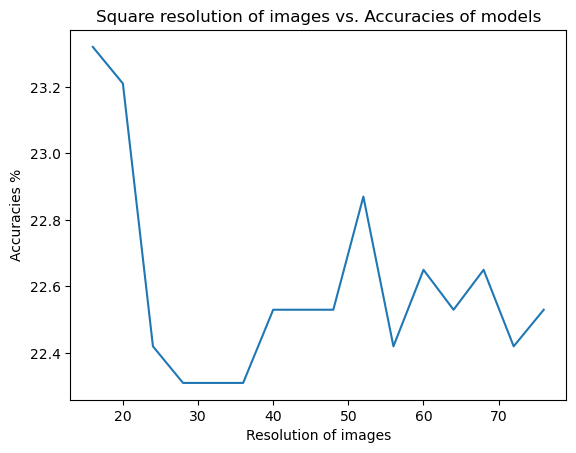

In [57]:
plt.plot(sizes, accuracies)
plt.xlabel("Resolution of images")
plt.ylabel("Accuracies %")
plt.title("Square resolution of images vs. Accuracies of models")
plt.show()

# Results from changing the resolution of the training images
The graph above shows that changing the resolution of the images do not have a significant impact on the accuracies of the models. The average accuracy seems to be 22.6%.

# Conclusion
The model was trained and tested on a dataset to classify roadsigns. To train and make predictions, the model uses raw pixel values, which are then normalised to a values between 0 and 1. This was a very simple model to implement and train, however, the Naive Bayes model struggled with high-dimensional image data where spatial ralationships are critical (e.g. the model could not make predictions based on edges, colour, etc...). This model would be more effective if the data in the dataset was simpler, or if there where less labels to predict.